## Machine Learning TP1 : Reconnaissance de Champignon

### Import des librairies

In [13]:
import pandas as pd
import numpy as np
import os
from IPython.display import Image, display
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import ensemble
from sklearn.tree import export_graphviz

df = pd.read_csv('sample_data/champignons.csv')


### 1. Preparation des données

1.1 importer et afficher les données dans un DataFrame.

Afficher le nombre de champignons toxiques ou non.

Vérifier qu'il n'y as pas de valeurs nulles

In [ ]:
from google.colab import files
import pandas as pd
df = pd.read_csv('sample_data/champignons.csv')
print(df)
print ('Champignons toxiques')
df.filter(df['toxicite'] == 'toxique')



        toxicite surface-chapeau ecchymoses attache-lamelles taille-lamelles  \
0        toxique           lisse        oui            libre          étroit   
1     comestible           lisse        oui            libre           large   
2     comestible           lisse        oui            libre           large   
3        toxique        écaillée        oui            libre          étroit   
4     comestible           lisse        non            libre           large   
...          ...             ...        ...              ...             ...   
8119  comestible           lisse        non         adhérent           large   
8120  comestible           lisse        non         adhérent           large   
8121  comestible           lisse        non         adhérent           large   
8122     toxique        écaillée        non            libre          étroit   
8123  comestible           lisse        non         adhérent           large   

       forme-pied surface-pied-sur-anne

""
0
1
2
3
4
...
8119
8120
8121
8122


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1.2 Encoder les données avec une colonne 1/0 par valeur possible.Eviter de générer une matrice "sparse"\
Afficher la taille des données (lignes x colonnes) et les noms de colonnes générées.\
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder

In [16]:

encoder = preprocessing.OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df)
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(df.columns))
print(f"Taille des données : {encoded_df.shape}")
print(f"_____________________________________________________")
print("Noms des colonnes générées :")
print(encoded_df.columns)
print("______________________________________________________")
print(encoded_df.head())

Taille des données : (8124, 42)
_____________________________________________________
Noms des colonnes générées :
Index(['toxicite_comestible', 'toxicite_toxique', 'surface-chapeau_fibreuse',
       'surface-chapeau_lisse', 'surface-chapeau_rainurée',
       'surface-chapeau_écaillée', 'ecchymoses_non', 'ecchymoses_oui',
       'attache-lamelles_adhérent', 'attache-lamelles_libre',
       'taille-lamelles_large', 'taille-lamelles_étroit', 'forme-pied_effilé',
       'forme-pied_élargissant', 'surface-pied-sur-anneau_fibreuse',
       'surface-pied-sur-anneau_lisse', 'surface-pied-sur-anneau_soyeuse',
       'surface-pied-sur-anneau_écaillée', 'couleur-pied-sur-anneau_beige',
       'couleur-pied-sur-anneau_blanc', 'couleur-pied-sur-anneau_brun',
       'couleur-pied-sur-anneau_cannelle', 'couleur-pied-sur-anneau_gris',
       'couleur-pied-sur-anneau_jaune', 'couleur-pied-sur-anneau_orange',
       'couleur-pied-sur-anneau_rose', 'couleur-pied-sur-anneau_rouge',
       'couleur-voile_

1.3 Créer un nouveau DataFrame avec les données et les noms de colonne. Mélanger les données. Afficher le résultat.

In [17]:
from sklearn.utils import shuffle
shuffled_df = shuffle(encoded_df, random_state=42)
print(shuffled_df.head())

      toxicite_comestible  toxicite_toxique  surface-chapeau_fibreuse  \
1971                  1.0               0.0                       1.0   
6654                  0.0               1.0                       0.0   
5606                  0.0               1.0                       0.0   
3332                  1.0               0.0                       0.0   
6988                  0.0               1.0                       0.0   

      surface-chapeau_lisse  surface-chapeau_rainurée  \
1971                    0.0                       0.0   
6654                    1.0                       0.0   
5606                    0.0                       0.0   
3332                    0.0                       0.0   
6988                    1.0                       0.0   

      surface-chapeau_écaillée  ecchymoses_non  ecchymoses_oui  \
1971                       0.0             1.0             0.0   
6654                       0.0             1.0             0.0   
5606                

1.4 Creer 4 jeux de données : train features et labels (70%) et dev features et labels (30%).\
Utiliser toxicite_toxique comme label. Ne pas garder de label (toxicite_toxique et toxicite_comestible) dans les features !

In [22]:
from sklearn.model_selection import train_test_split

features = shuffled_df.drop(columns=['toxicite_toxique', 'toxicite_comestible'])
labels = shuffled_df['toxicite_toxique']

train_features, dev_features, train_labels, dev_labels = train_test_split(
    features, labels, test_size=0.3, random_state=42
)

print(labels)
print(train_features)
print(train_labels)
print(dev_features)
print(dev_labels)

1971    0.0
6654    1.0
5606    1.0
3332    0.0
6988    1.0
       ... 
5226    1.0
5390    0.0
860     0.0
7603    1.0
7270    0.0
Name: toxicite_toxique, Length: 8124, dtype: float64
      surface-chapeau_fibreuse  surface-chapeau_lisse  \
4238                       1.0                    0.0   
7921                       1.0                    0.0   
3939                       1.0                    0.0   
4512                       1.0                    0.0   
6059                       0.0                    1.0   
...                        ...                    ...   
7462                       0.0                    0.0   
593                        0.0                    0.0   
6930                       0.0                    0.0   
6971                       0.0                    1.0   
3709                       0.0                    0.0   

      surface-chapeau_rainurée  surface-chapeau_écaillée  ecchymoses_non  \
4238                       0.0                       0

## 2. Arbre de décision

In [41]:

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.ensemble import RandomForestClassifier


2.1 Entrainer un arbre de décision sur les données d'apprentissage. Afficher l'arbre obtenu en utilisant plot_tree.

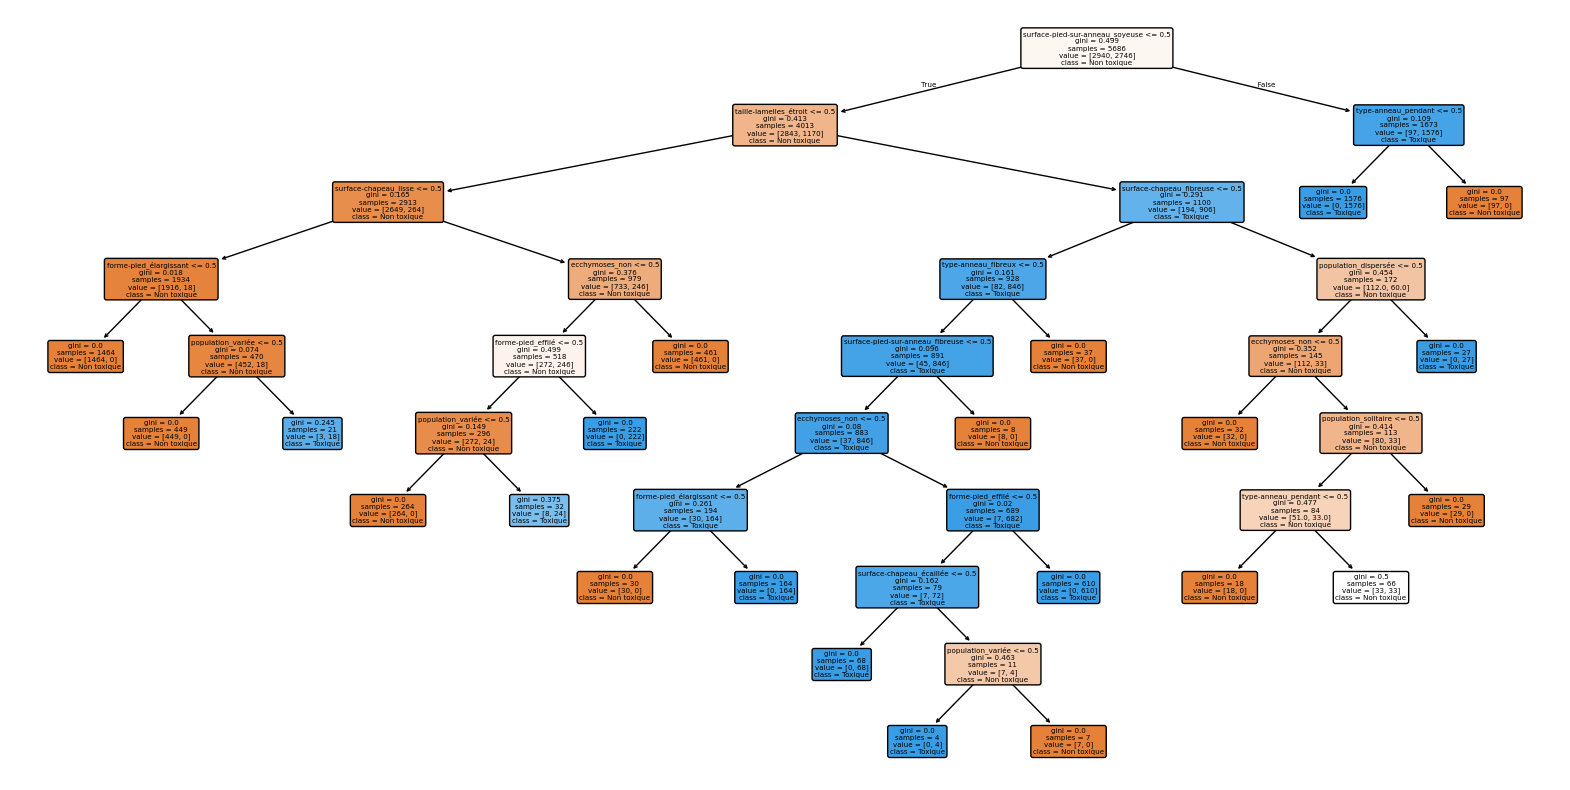

In [27]:


clf = DecisionTreeClassifier(random_state=42)
clf.fit(train_features, train_labels)
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, filled=True, feature_names=train_features.columns, class_names=['Non toxique', 'Toxique'], rounded=True) # Use tree.plot_tree
plt.show()

2.2 Afficher l'arbre obtenu en utilisant graphwiz

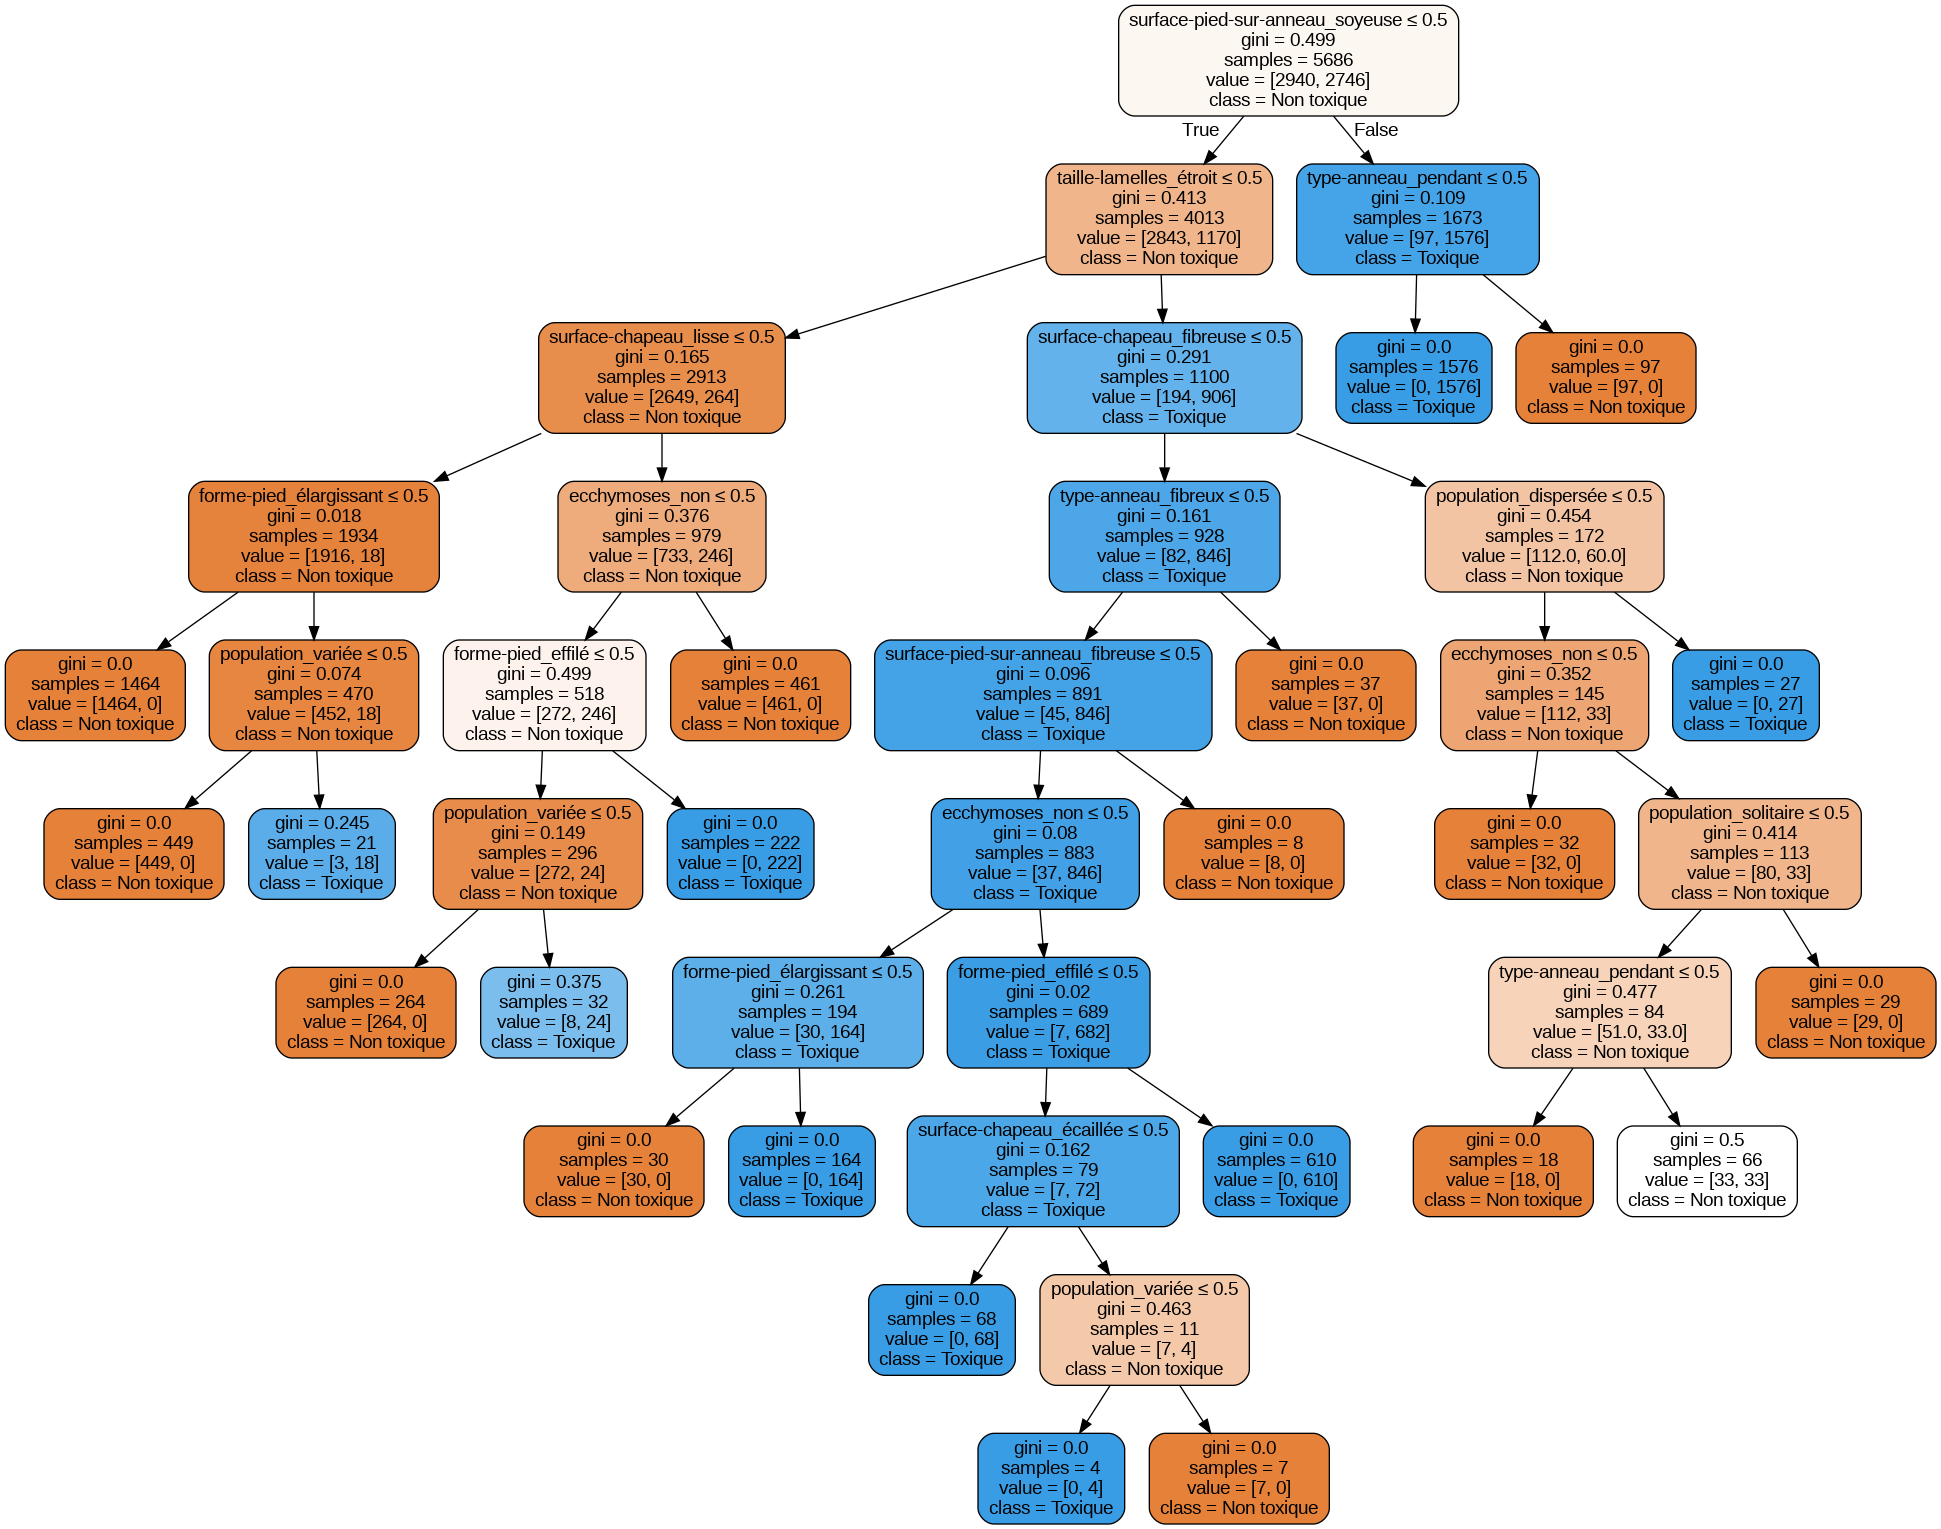

In [28]:
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=train_features.columns,
    class_names=['Non toxique', 'Toxique'],
    filled=True,
    rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="png")
display(Image(filename=f"decision_tree.png"))

2.3 Mesurer la précision du modèle sur les données de dev

In [31]:
dev_predictions = clf.predict(dev_features)
accuracy = accuracy_score(dev_labels, dev_predictions)

print(f"Précision du modèle : {accuracy:.2f}")

Précision du modèle : 0.99


## 3. Modèle de forêt

In [47]:
from sklearn.model_selection import GridSearchCV
import random


3.1 Réalisez un algorithme de Random Forest sur les données. Utiliser 500 arbres et une profondeur de 6.

In [45]:
rf_clf = RandomForestClassifier(n_estimators=500, max_depth=6, random_state=42)
rf_clf.fit(train_features, train_labels)
dev_predictions = rf_clf.predict(dev_features)
accuracy = accuracy_score(dev_labels, dev_predictions)

3.2 Afficher trois arbres au hasard.

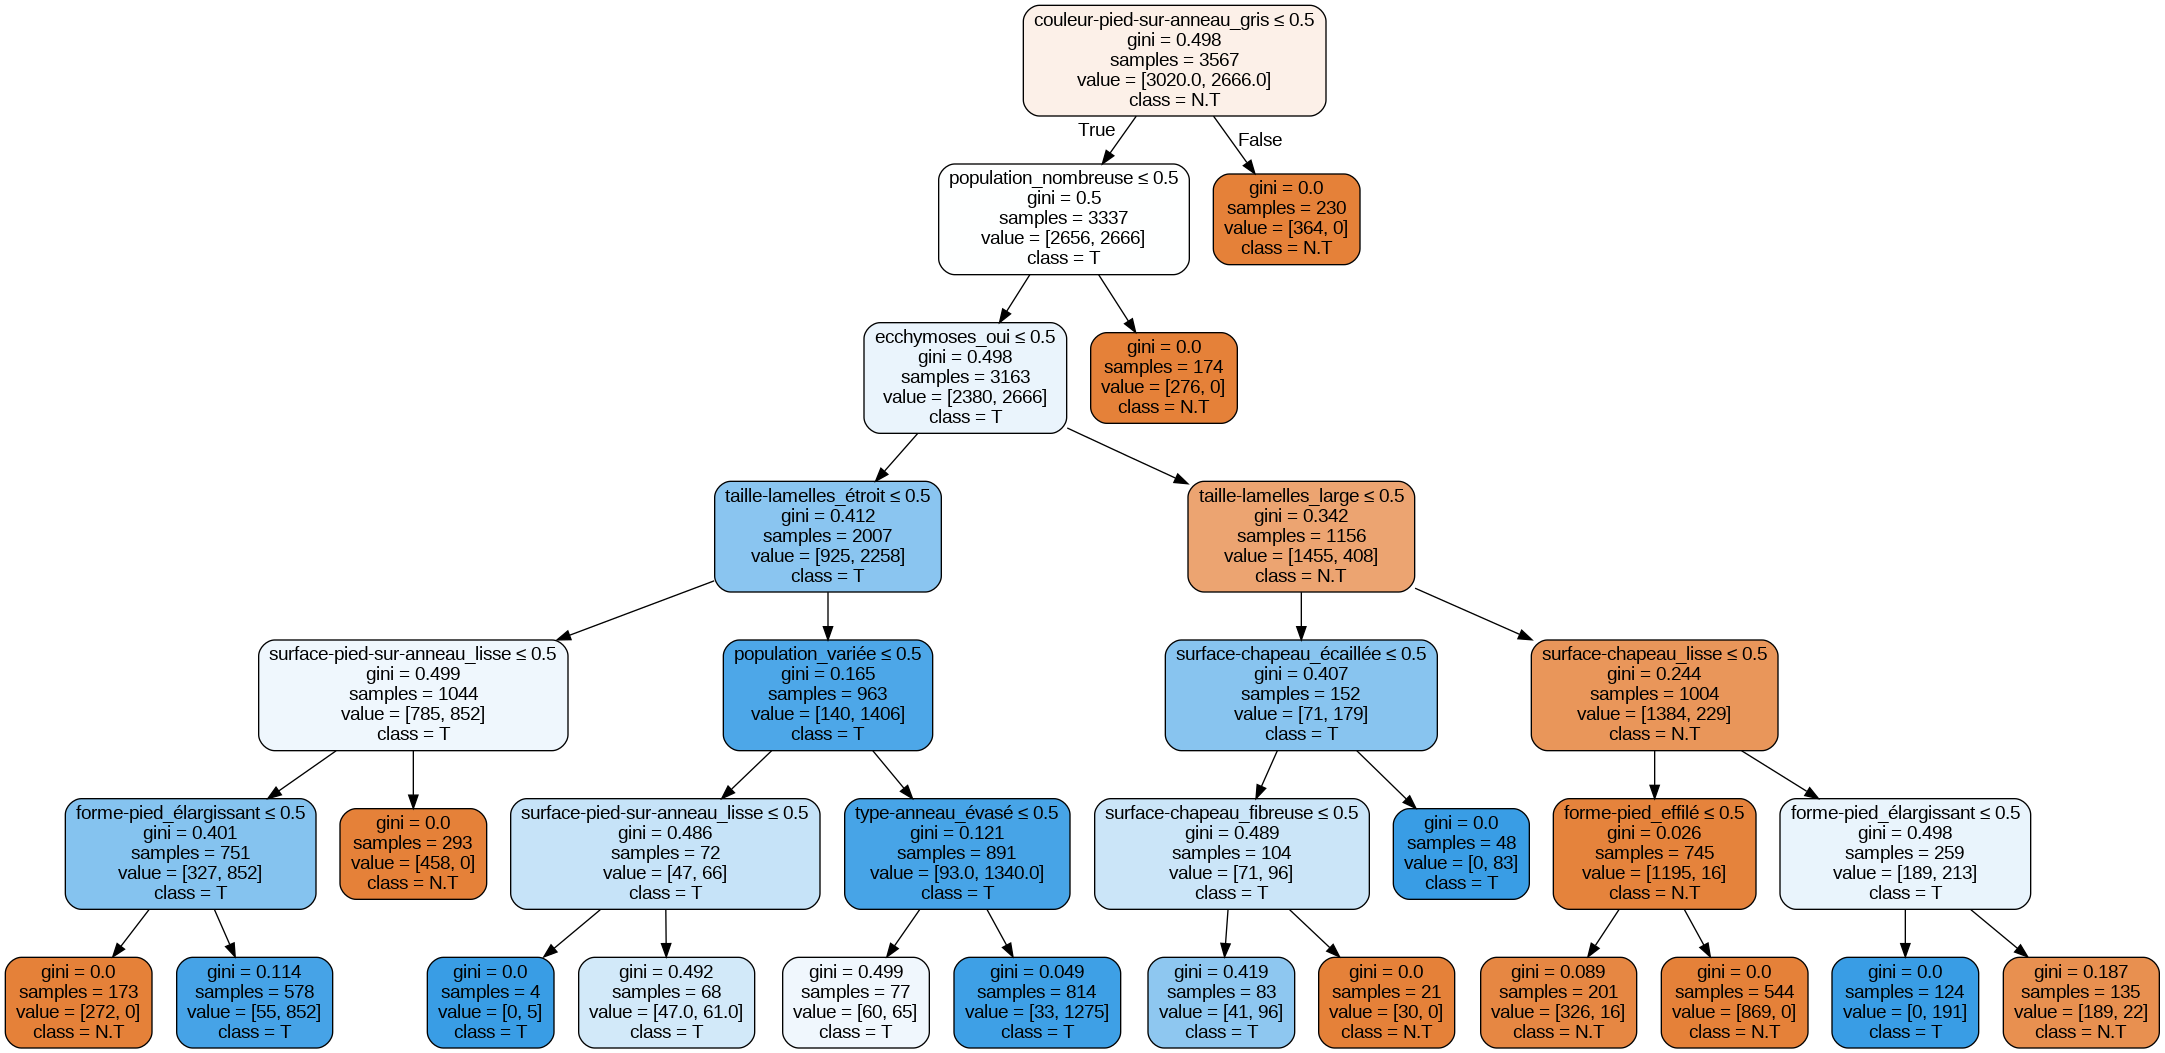

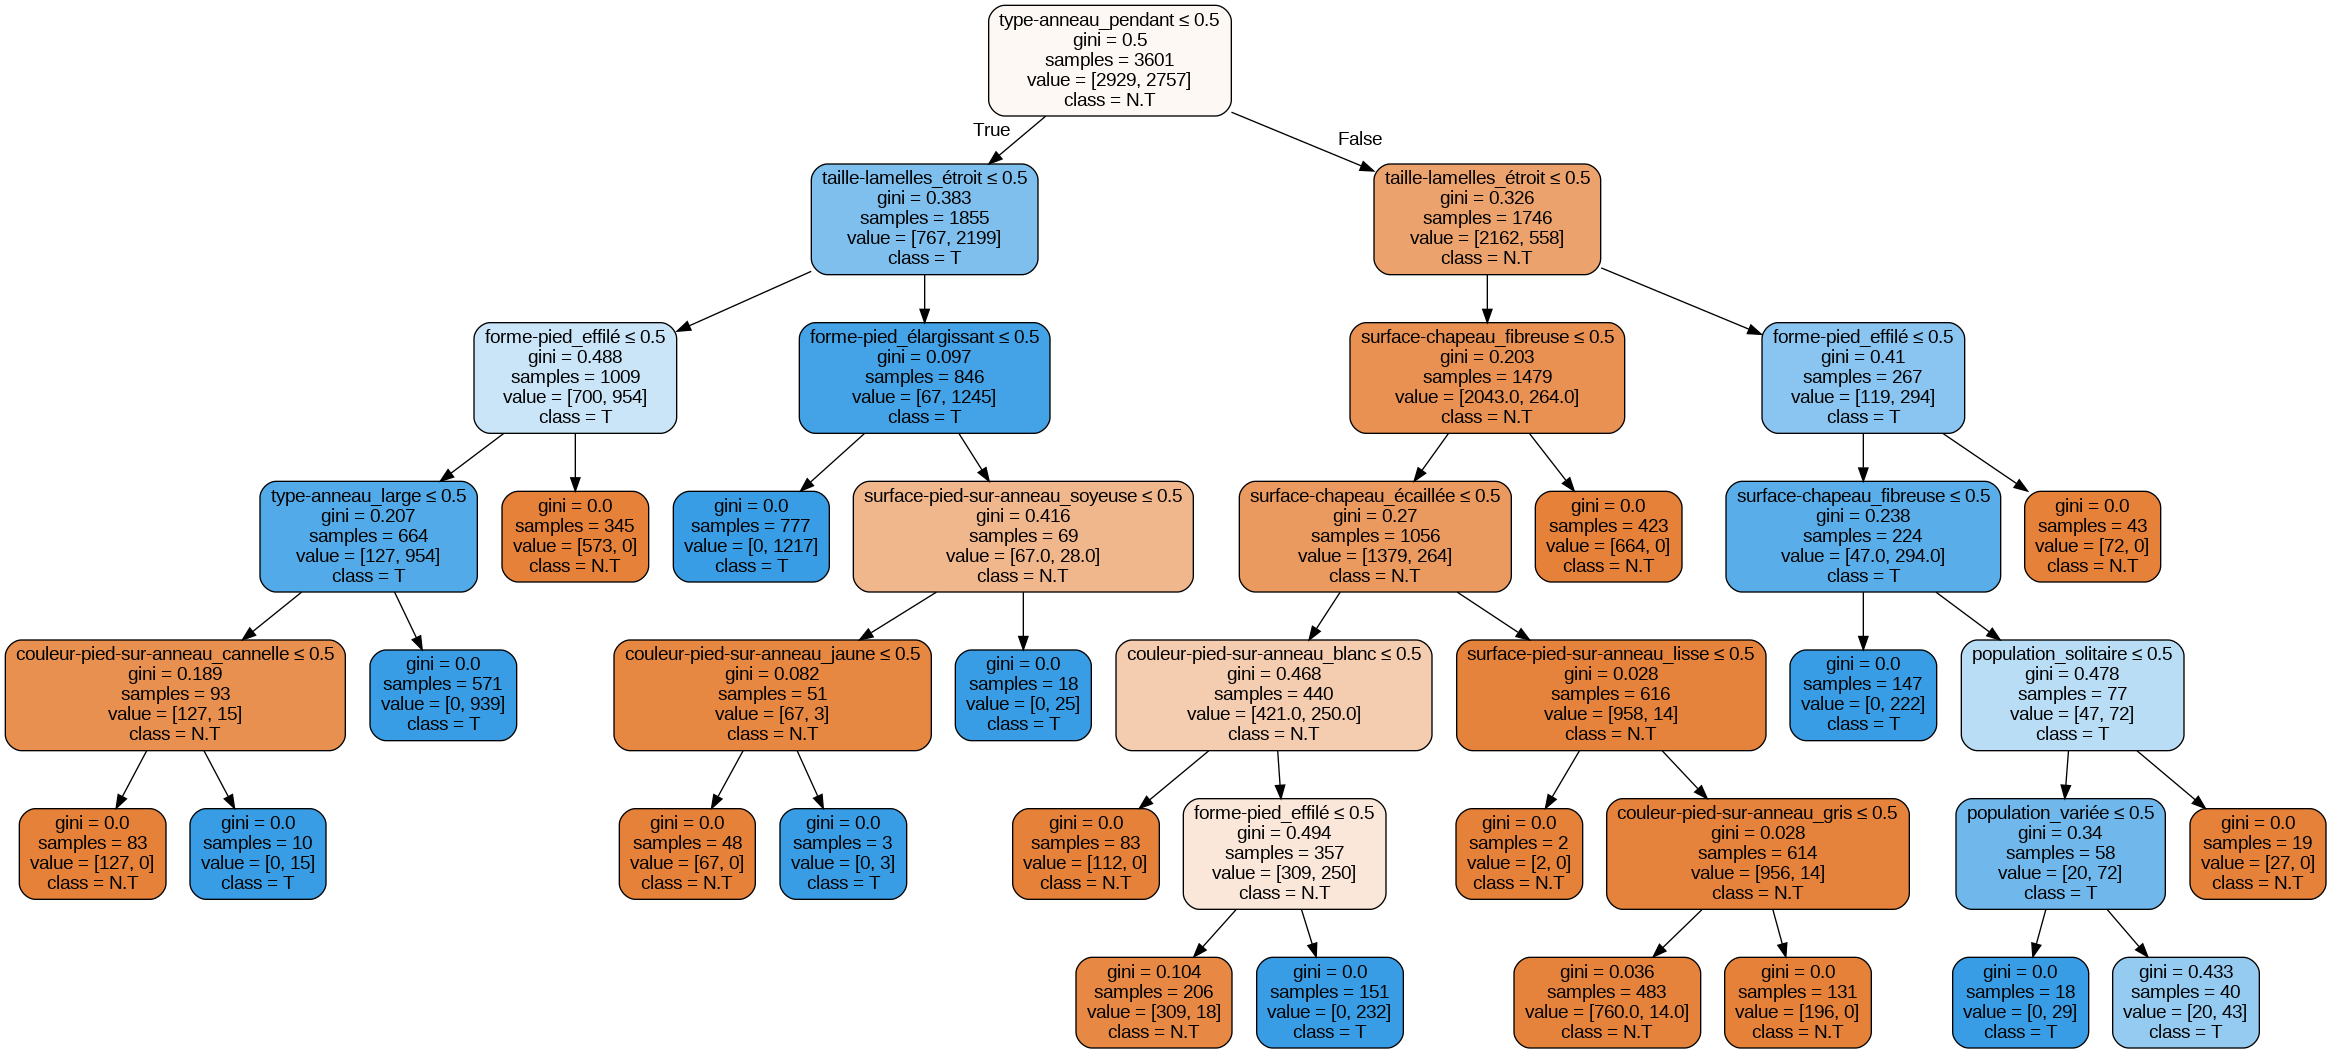

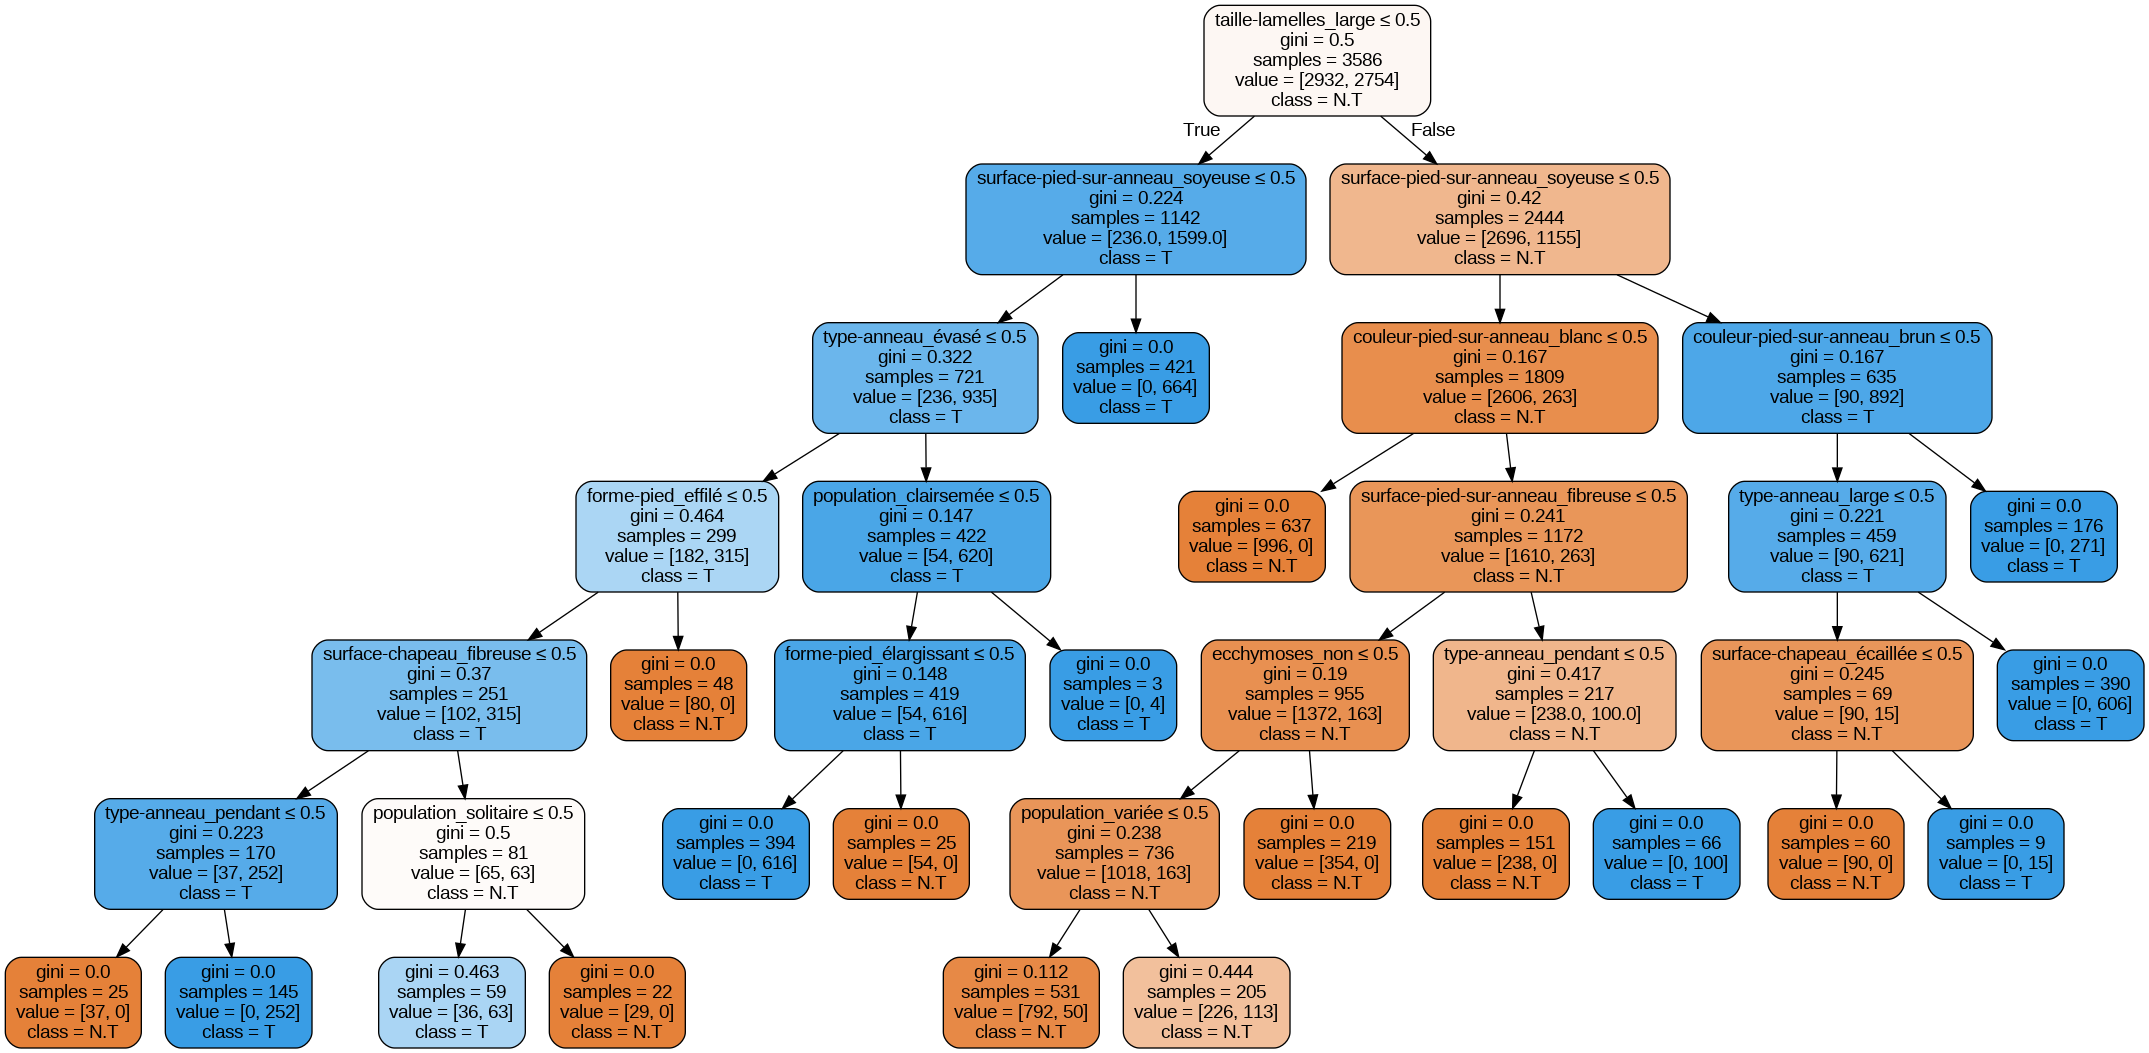

In [39]:


random_trees = random.sample(rf_clf.estimators_, 3)

for i, tree in enumerate(random_trees):
    dot_data = export_graphviz(
        tree,
        out_file=None,
        feature_names=train_features.columns,
        class_names=['N.T', 'T'],
        filled=True,
        rounded=True,
        special_characters=True
    )
    graph = graphviz.Source(dot_data)
    graph.render(f"random_tree_{i}", format="png")
    display(Image(filename=f"random_tree_{i}.png"))

3.3 Mesurer la précision du modèle Random Forest sur les données de dev

In [40]:
dev_predictions = rf_clf.predict(dev_features)
accuracy = accuracy_score(dev_labels, dev_predictions)
print(f"Précision du modèle Random Forest : {accuracy:.2f}")

Précision du modèle Random Forest : 0.97


## 4. optimisation des paramètres

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

4.1 chercher l'ensembles de données la meilleure combinaison sur max_depth/n_estimator.

Afficher les paramètre du modèle et a précision obtenue.

Réexécuter un apprentissage avec la meilleure combinaison.


In [49]:

rf_clf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [4, 6, 8, 10, 12]
}
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(train_features, train_labels)
best_rf_clf = grid_search.best_estimator_
dev_predictions = best_rf_clf.predict(dev_features)
accuracy = accuracy_score(dev_labels, dev_predictions)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


4.2 Afficher les paramètres optimaux et la précisions obtenue sur les données dev

In [50]:
print(f"Paramètres optimaux : {grid_search.best_params_}")
print(f"Précision obtenue sur les données de développement : {accuracy:.2f}")

Paramètres optimaux : {'max_depth': 10, 'n_estimators': 100}
Précision obtenue sur les données de développement : 0.99


4.3 Classer et Afficher les caractéristiques d'importance supérieure à 1%

In [51]:
feature_importances = best_rf_clf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': train_features.columns,
    'Importance': feature_importances
})

important_features = importance_df[importance_df['Importance'] > 0.01]
important_features = important_features.sort_values(by='Importance', ascending=False)

print("Caractéristiques dont l'importance est supérieure à 1% affichés de manière classés: ")
print(important_features)

Caractéristiques dont l'importance est supérieure à 1%: 
                             Feature  Importance
9             taille-lamelles_étroit    0.104402
8              taille-lamelles_large    0.092028
14   surface-pied-sur-anneau_soyeuse    0.091778
32               type-anneau_pendant    0.078515
39                 population_variée    0.070998
4                     ecchymoses_non    0.063324
13     surface-pied-sur-anneau_lisse    0.054886
31                 type-anneau_large    0.049016
5                     ecchymoses_oui    0.046451
10                 forme-pied_effilé    0.043496
1              surface-chapeau_lisse    0.037784
11            forme-pied_élargissant    0.036663
17     couleur-pied-sur-anneau_blanc    0.035560
36              population_dispersée    0.031010
12  surface-pied-sur-anneau_fibreuse    0.025306
33                 type-anneau_évasé    0.022177
38              population_solitaire    0.018542
0           surface-chapeau_fibreuse    0.017512
3           

## 5. Stacking

Essayer différents modèles d'estimateur final

In [53]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.ensemble import StackingClassifier

base_models = [
    ('lr', LogisticRegression(random_state=42)),
    ('svc', make_pipeline(StandardScaler(), SVC(probability=True, random_state=42))),
    ('gnb', GaussianNB()),
    ('perceptron', Perceptron(random_state=42))
]

final_estimators = [
    LogisticRegression(random_state=42),
    SVC(probability=True, random_state=42),
    GaussianNB(),
    Perceptron(random_state=42)
]

for final_estimator in final_estimators:
    stacking_clf = StackingClassifier(estimators=base_models, final_estimator=final_estimator, cv=5)
    stacking_clf.fit(train_features, train_labels)
    dev_predictions = stacking_clf.predict(dev_features)
    accuracy = accuracy_score(dev_labels, dev_predictions)

    print(f"Estimateur final : {final_estimator.__class__.__name__}")
    print(f"Précision sur les données de développement : {accuracy:.2f}")
    print("_______________________________________________________")


Estimateur final : LogisticRegression
Précision sur les données de développement : 0.99
_______________________________________________________
Estimateur final : SVC
Précision sur les données de développement : 0.98
_______________________________________________________
Estimateur final : GaussianNB
Précision sur les données de développement : 0.99
_______________________________________________________
Estimateur final : Perceptron
Précision sur les données de développement : 0.99
_______________________________________________________


## 6. Gradient Boosting

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

6. Exécuter un apprentissage de Gradient Boosting avec et sans "Early Stopping" sur le nombre d'estimateurs. Comparer avec le résultat sur les données dev.

In [56]:

gb_clf = GradientBoostingClassifier(n_estimators=350, random_state=42)
gb_clf.fit(train_features, train_labels)
dev_predictions = gb_clf.predict(dev_features)
accuracy = accuracy_score(dev_labels, dev_predictions)
print(f"Précision du modèle Gradient Boosting sans Early Stopping sur les données de dev : {accuracy:.2f}")

Précision du modèle Gradient Boosting sans Early Stopping sur les données de développement : 0.99


In [57]:
gb_clf = GradientBoostingClassifier(random_state=42, warm_start=True)
best_accuracy = 0
best_n_estimators = 0
patience = 5
no_improvement_count = 0
for n_estimators in range(1, 501):
    gb_clf.n_estimators = n_estimators
    gb_clf.fit(train_features, train_labels)
    dev_predictions = gb_clf.predict(dev_features)
    accuracy = accuracy_score(dev_labels, dev_predictions)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_estimators = n_estimators
        no_improvement_count = 0
    else:
        no_improvement_count += 1
    if no_improvement_count >= patience:
        break

print(f"Précision du modèle Gradient Boosting avec Early Stopping sur les données de dev : {best_accuracy:.2f}")
print(f"Nombre optimal d'estimateurs : {best_n_estimators}")

Précision du modèle Gradient Boosting avec Early Stopping sur les données de développement : 0.93
Nombre optimal d'estimateurs : 8


## 7. (Optionnel) Recommencer les exercices précédents en utilisant les "ordinal encoders". Que remarquez-vous ?